In [1]:
from Precode import *
import numpy

data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S1('9485') # please replace 0111 with your last four digit of your ID

Strategy 1: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

3
[[4.59083727 7.53490523]
 [2.10054891 1.44144019]
 [3.0093283  1.45065717]]
5
[[2.23518365 3.77218252]
 [4.5872861  7.29024049]
 [4.74625798 3.54661053]
 [3.81485895 6.91844078]
 [7.89366657 3.58341277]]


In [4]:
print(data[0][0])

2.0592490214343924


In [5]:
import matplotlib.pyplot as plt

In [6]:
def print_KMeans(data, k, points):
    plt.scatter([x[0] for x in data], [y[1] for y in data])
    for i in range(0,k):
        plt.scatter(points[i][0], points[i][1], label=f"c{i}")
    plt.legend()
    plt.show()

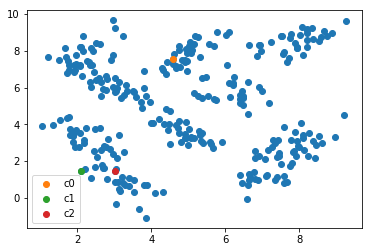

In [7]:
print_KMeans(data, k1, i_point1)

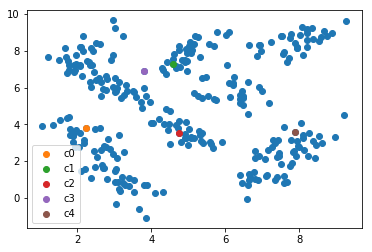

In [8]:
print_KMeans(data, k2, i_point2)

In [9]:
print(k1)
print(i_point1)

3
[[4.59083727 7.53490523]
 [2.10054891 1.44144019]
 [3.0093283  1.45065717]]


In [53]:
def KMeans(data, k, points_original):
    points = points_original.copy()
    iteration = 0
    centroids = {}
    #init the centroids
    for i in range(0,k):
        centroids[f"c{i}"] = points[i]
    #print(centroids)
    while True:
        iteration += 1
        classified_points = {}
        for key in centroids:
            classified_points[key] = list()
        #classify each point
        for i in range(0,len(data)):
            distances = []
            for key, val in centroids.items():
                diff = abs(np.subtract(data[i],val))
                distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
            classified_points[f"c{np.argmin(distances)}"].append(data[i])
        #print(classified_points)
        #Calculate the new Mean
        new_centroids = {}
        for key, val in classified_points.items():
            new_centroids[key] = np.array([np.mean([x[0] for x in classified_points[key]]), np.mean([x[1] for x in classified_points[key]])])
#         print(centroids.values())
#         print(new_centroids.values())
        total = 0
        for key,v in centroids.items():
            if(centroids[key].tolist() == new_centroids[key].tolist()):
                total += 1
        if(total == k):
            print(f"This took {iteration} iterations.")
            return [x for x in new_centroids.values()]
        else:
            centroids = new_centroids

This took 12 iterations.
[array([4.83091958, 7.29959959]), array([3.23489005, 2.5530322 ]), array([7.23975119, 2.48208269])]


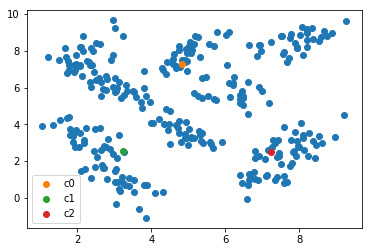

In [54]:
news = KMeans(data, k1, i_point1)
print(news)
print_KMeans(data, k1, news)

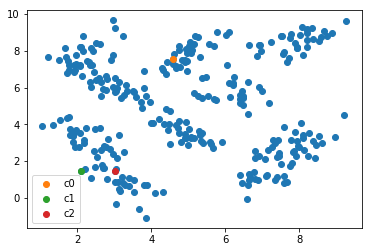

In [55]:
print_KMeans(data, k1, i_point1)

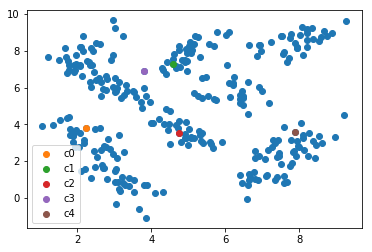

In [56]:
print_KMeans(data, k2, i_point2)

This took 7 iterations.
[array([2.68198633, 2.09461587]), array([6.7786424 , 8.07967641]), array([5.22321274, 4.22502829]), array([2.87490813, 7.01082281]), array([7.55616782, 2.23516796])]


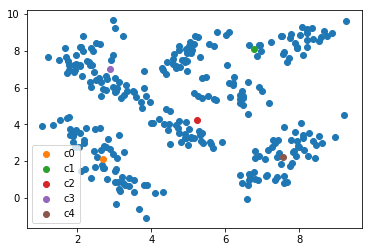

In [57]:
news = KMeans(data, k2, i_point2)
print(news)
print_KMeans(data, k2, news)

In [58]:
def loss_fn(data, k, points):
    centroids = {}
    #init the centroids
    for i in range(0,k):
        centroids[f"c{i}"] = points[i]
    classified_points = {}
    for key in centroids:
            classified_points[key] = 0
    #classify each point
    for i in range(0,len(data)):
        distances = []
        for key, val in centroids.items():
            diff = abs(numpy.subtract(data[i],val))
            distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
        classified_points[f"c{np.argmin(distances)}"] += (min(distances)) ** 2
    return sum(classified_points.values())


In [59]:
loss_fn(data, k1, KMeans(data, k1, i_point1))

This took 12 iterations.


1338.107601652099

In [60]:
loss_fn(data, k2, KMeans(data, k2, i_point2))

This took 7 iterations.


598.5546443663115